## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [7]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [11]:
# Create project folder path
path=r'C:\Users\Bori\Documents\Careerfoundry\Happiness\01 Data'

In [12]:
# Import data

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'happiness_checked.csv'))

In [13]:
df.head()

,Unnamed: 0,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity,Year
0,0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [14]:
# Import data 

df_index = pd.read_csv(os.path.join(path,'WorldHappinessIndex2013-2023.csv'))

In [15]:
df_index.head()

,Country,Year,Index,Rank
0,Afghanistan,2013,4.040,143.0
1,Singapore,2013,6.546,30.0
2,Comoros,2013,3.851,149.0
3,Sierra Leone,2013,4.318,127.0
4,Congo,2013,NaN,NaN


In [18]:
df_index.shape

(1670, 4)

### Cleaning df_index

In [17]:
#Looking for mixed type data
for col in df_index.columns.tolist():
  weird = (df_index[[col]].applymap(type) != df_index[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_index[weird]) > 0:
    print (col)

No mixed type data was found.

In [19]:
#Checking for missing values
df_index.isnull().sum()

Country      0
Year         0
Index      147
Rank       147
dtype: int64

In [24]:
# Creating a subset of missing values
df_nan = df_index[df_index['Index'].isnull() == True]

In [28]:
df_nan.head(30)

,Country,Year,Index,Rank
4,Congo,2013,NaN,NaN
18,Puerto Rico,2013,NaN,NaN
36,Bhutan,2013,NaN,NaN
52,Somalia,2013,NaN,NaN
60,South Sudan,2013,NaN,NaN
75,Maldives,2013,NaN,NaN
88,Ivory Coast,2013,NaN,NaN
104,Eswatini,2013,NaN,NaN
115,Gambia,2013,NaN,NaN
133,Namibia,2013,NaN,NaN


In [30]:
df_nan.tail(30)

,Country,Year,Index,Rank
1505,Turkmenistan,2023,NaN,NaN
1514,Yemen,2023,NaN,NaN
1523,Azerbaijan,2023,NaN,NaN
1527,Angola,2023,NaN,NaN
1529,Trinidad and Tobago,2023,NaN,NaN
1530,Haiti,2023,NaN,NaN
1547,Oman,2023,NaN,NaN
1551,Eswatini,2023,NaN,NaN
1552,North Cyprus,2023,NaN,NaN
1566,Lesotho,2023,NaN,NaN


It seems like the same 147 entries have missing values in each year. 

In [20]:
df_dups = df_index[df_index.duplicated()]

In [21]:
#Addressing duplicates
df_index_clean = df_index.drop_duplicates()

In [22]:
df_index.shape

(1670, 4)

No duplicates were found.

In [23]:
df_index_clean.describe()

,Year,Index,Rank
count,1670.000000,1523.000000,1523.000000
mean,2018.400000,5.438242,76.777413
std,3.040647,1.115623,44.190303
min,2013.000000,1.859000,1.000000
25%,2016.000000,4.594000,39.000000
50%,2018.500000,5.425000,77.000000
75%,2021.000000,6.258500,115.000000
max,2023.000000,7.842000,158.000000


## 2. Analysis 

In [33]:
# Create subset including: GDP per capita, GDP per capita, Social support, Health (Life Expectancy), Freedom, Perceptions of corruption, and Generosity
df_sub = df[['Happiness Score', 'GDP per capita', 'Social support', 'Health (Life Expectancy)', 'Freedom', 'Perceptions of corruption','Generosity']]

In [34]:
# Create a correlation matrix using pandas

df_sub.corr()

,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity
Happiness Score,1.000000,0.740215,0.641029,0.734688,0.557694,0.403145,0.113297
GDP per capita,0.740215,1.000000,0.522092,0.564953,0.439453,0.338105,-0.153904
Social support,0.641029,0.522092,1.000000,0.561274,0.364927,0.147278,-0.006385
Health (Life Expectancy),0.734688,0.564953,0.561274,1.000000,0.261374,0.256215,0.025932
Freedom,0.557694,0.439453,0.364927,0.261374,1.000000,0.433718,0.157050
Perceptions of corruption,0.403145,0.338105,0.147278,0.256215,0.433718,1.000000,0.224344
Generosity,0.113297,-0.153904,-0.006385,0.025932,0.157050,0.224344,1.000000


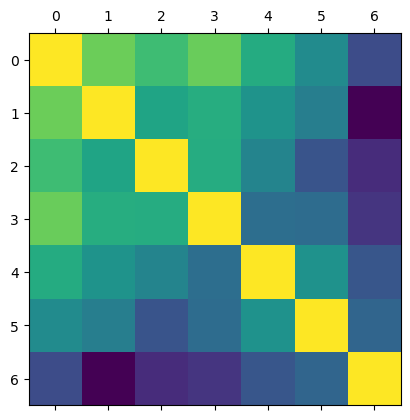

In [36]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

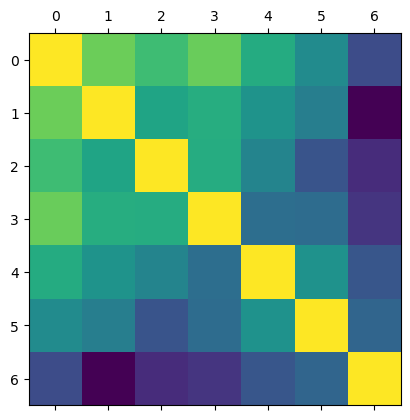

In [38]:
# Save figure
plt.matshow(df_sub.corr())
plt.savefig("out.png") 

In [39]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Bori\\Documents\\Careerfoundry\\Happiness\\02 Script'

Text(0.5, 1.0, 'Correlation Matrix')

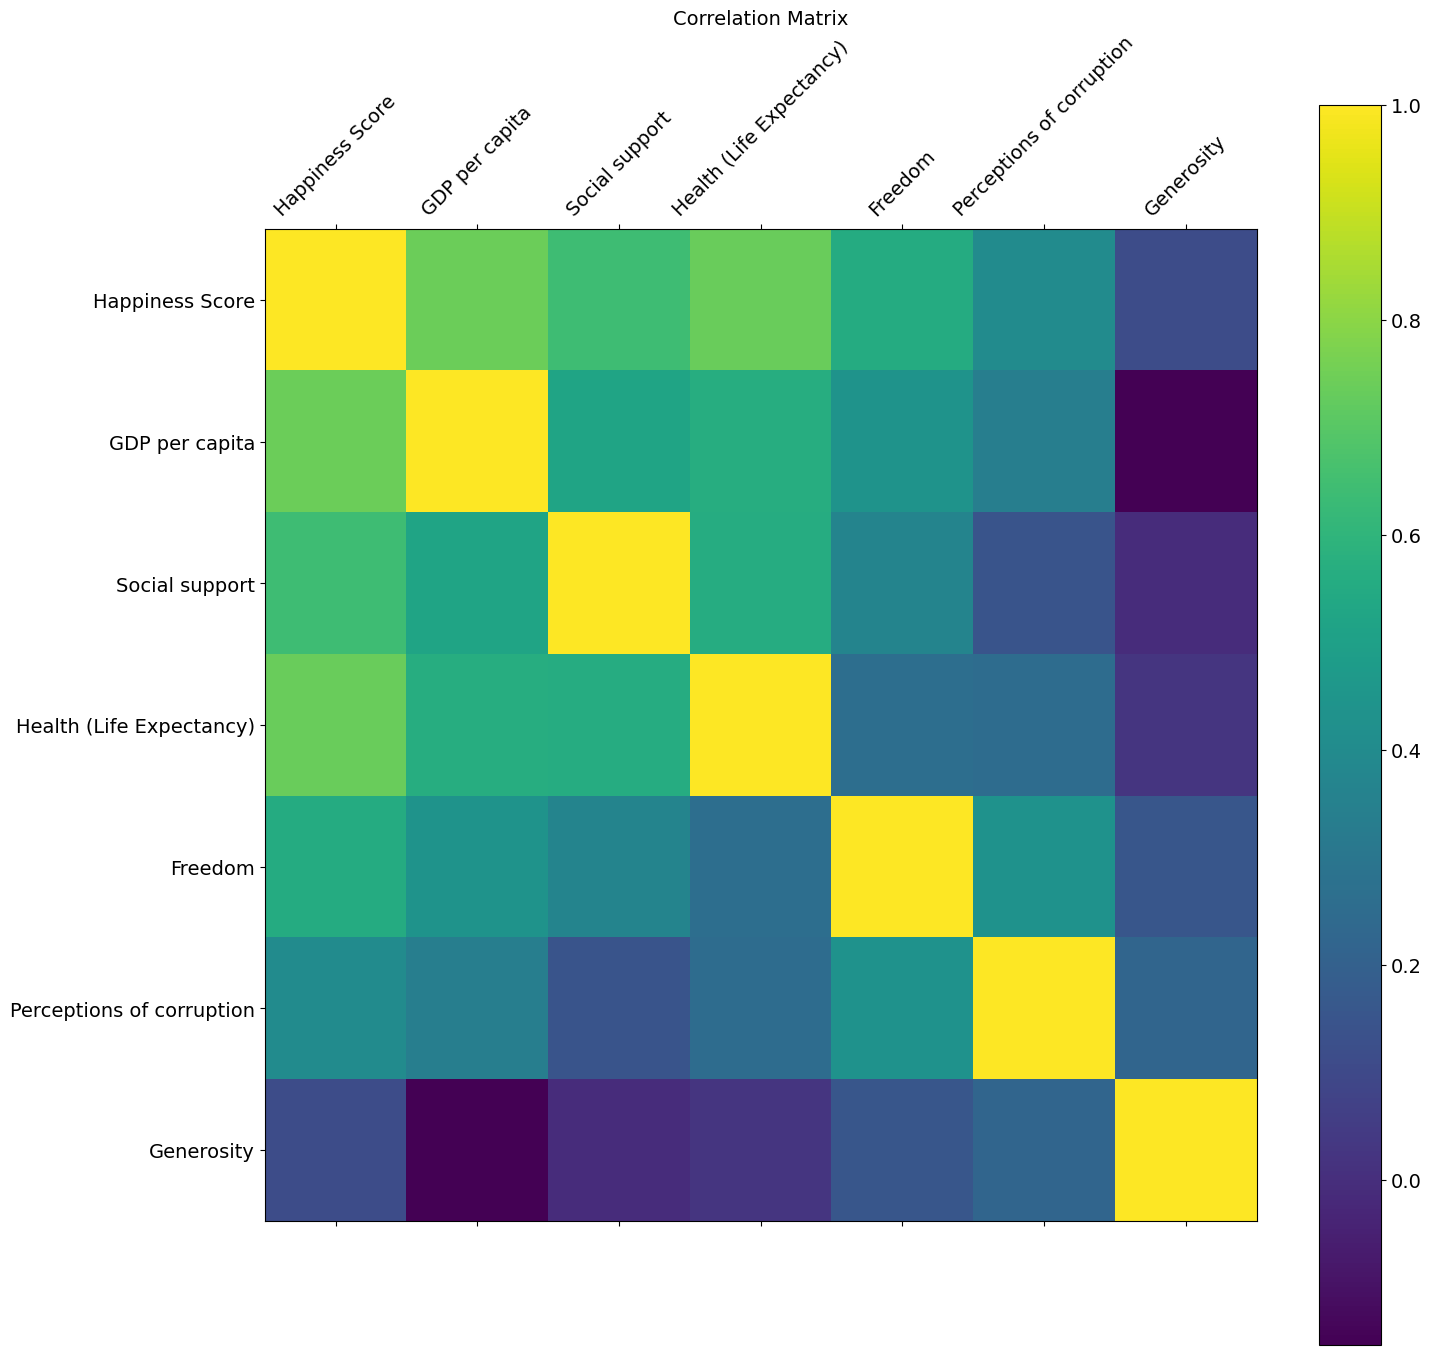

In [44]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(16, 16)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Create a correlation heatmap using seaborn:

In [51]:
df.columns

Index(['Unnamed: 0', 'Country', 'Happiness Rank', 'Happiness Score',
       'GDP per capita', 'Social support', 'Health (Life Expectancy)',
       'Freedom', 'Perceptions of corruption', 'Generosity', 'Year'],
      dtype='object')

In [57]:
df_sub

,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
1362,NaN,0.53100,0.78400,0.10500,0.37500,0.06800,0.18300
1363,NaN,0.75800,0.88100,0.06900,0.36300,0.11700,0.11200
1364,NaN,0.67000,0.54000,0.09200,0.37100,0.05100,0.19300
1365,NaN,1.41700,0.47600,0.39800,0.12300,0.02700,0.06100


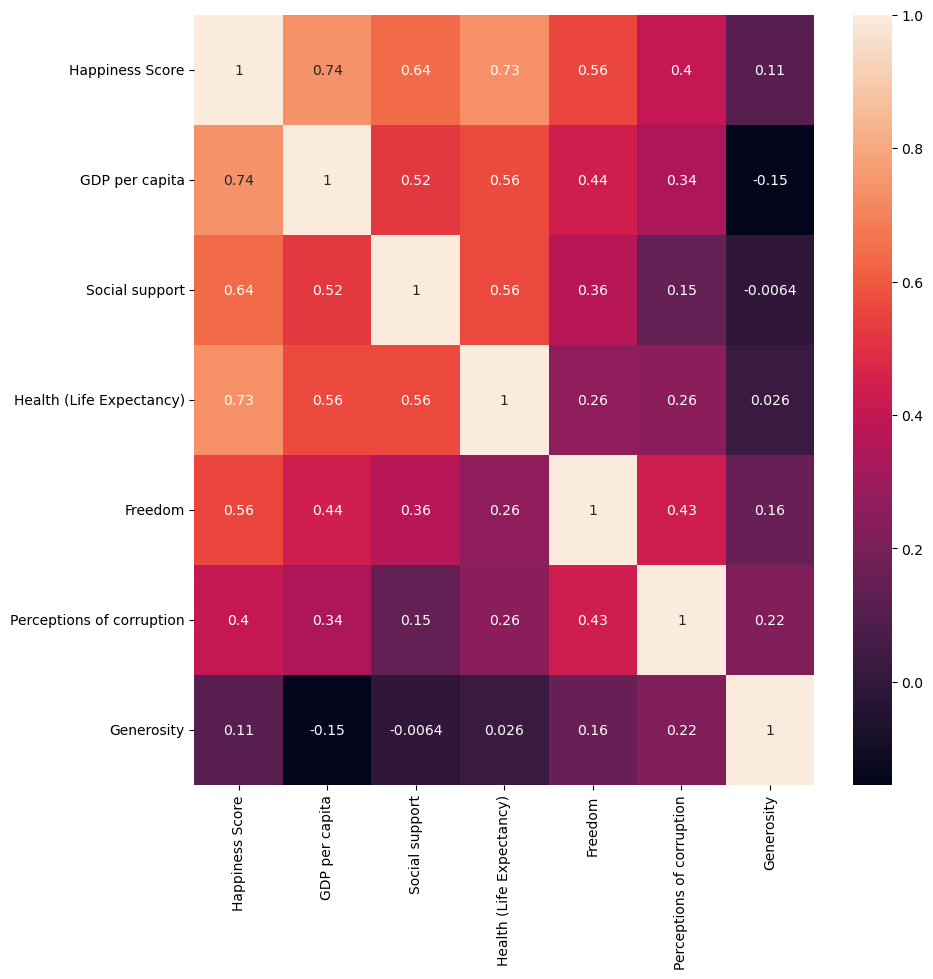

In [56]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

I see several strong correlations, between Happiness score with GDP per capita, Social Support, Health, and Freedom. GDP per capita also has strong correlation with Social support and Health, and moderate correlation with Freedom. Besides GDP per capita and Happiness score, Social support has strong correlation with Health. Freedom has - surprisingly - only strong correlattion with Happiness score, and moderate correlation with GDP per capita, Social support an Perceptions of corruption. In the case of perceptions of corruption, there is no stron correlation, but it has moderate correlation with Happiness score, GDP per capita and Freedom. Generosity has no strong neither moderate correlation with any other category. 

### Scatterplots for strongest correlations

C:\Users\Bori\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


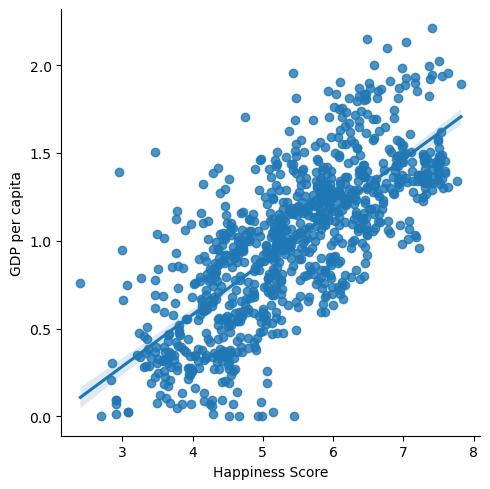

In [58]:
# Create a scatterplot for the "Happiness Score" and "GDP per capita" columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'GDP per capita', data = df)

C:\Users\Bori\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


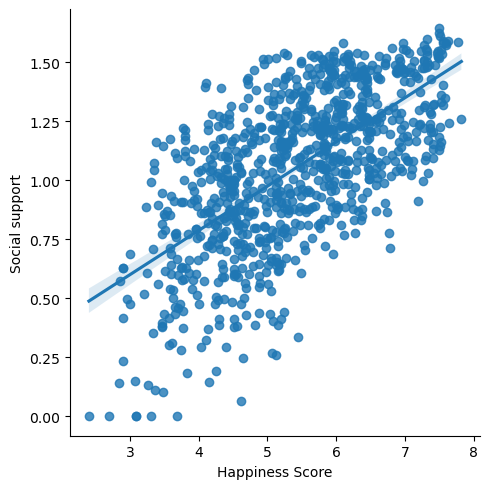

In [59]:
# Create a scatterplot for the "Happiness Score" and "Social support" columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'Social support', data = df)

C:\Users\Bori\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


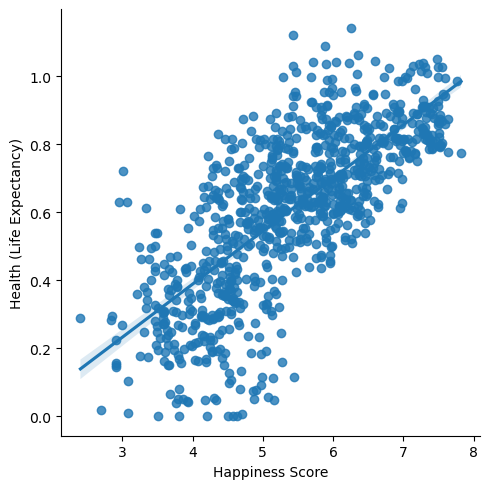

In [61]:
# Create a scatterplot for the "Happiness Score" and "Health(Life expectancy)" columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'Health (Life Expectancy)', data = df)

C:\Users\Bori\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


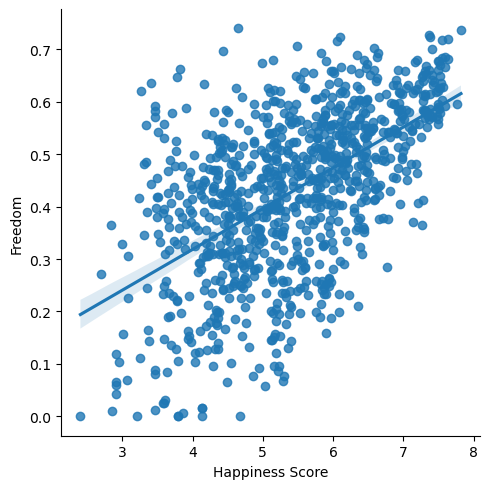

In [62]:
# Create a scatterplot for the "Happiness Score" and "Freedom" columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'Freedom', data = df)

C:\Users\Bori\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


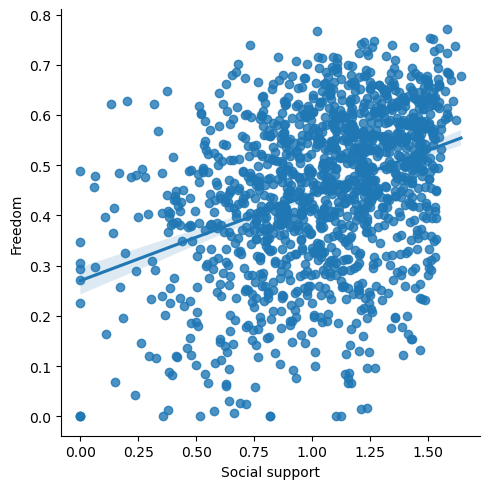

In [63]:
# Create a scatterplot for the "Happiness Score" and "GDP per capita" columns in seaborn

sns.lmplot(x = 'Social support', y = 'Freedom', data = df)

C:\Users\Bori\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


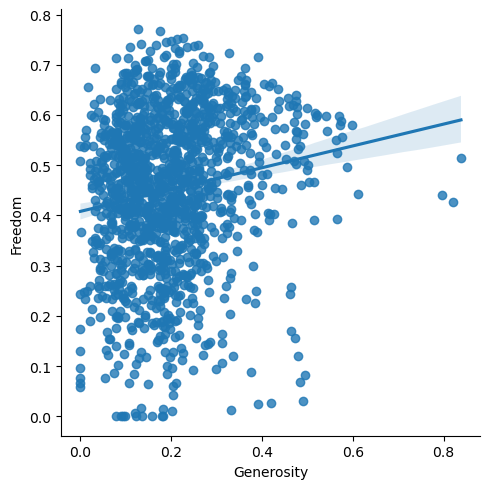

In [64]:
# Create a scatterplot for the "Happiness Score" and "GDP per capita" columns in seaborn

sns.lmplot(x = 'Generosity', y = 'Freedom', data = df)

With this amount of data, scatterplots are probably not the most informative types of visualization. The difference is still visible  in the strenght of the respective correlations.

### Pair plot

C:\Users\Bori\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


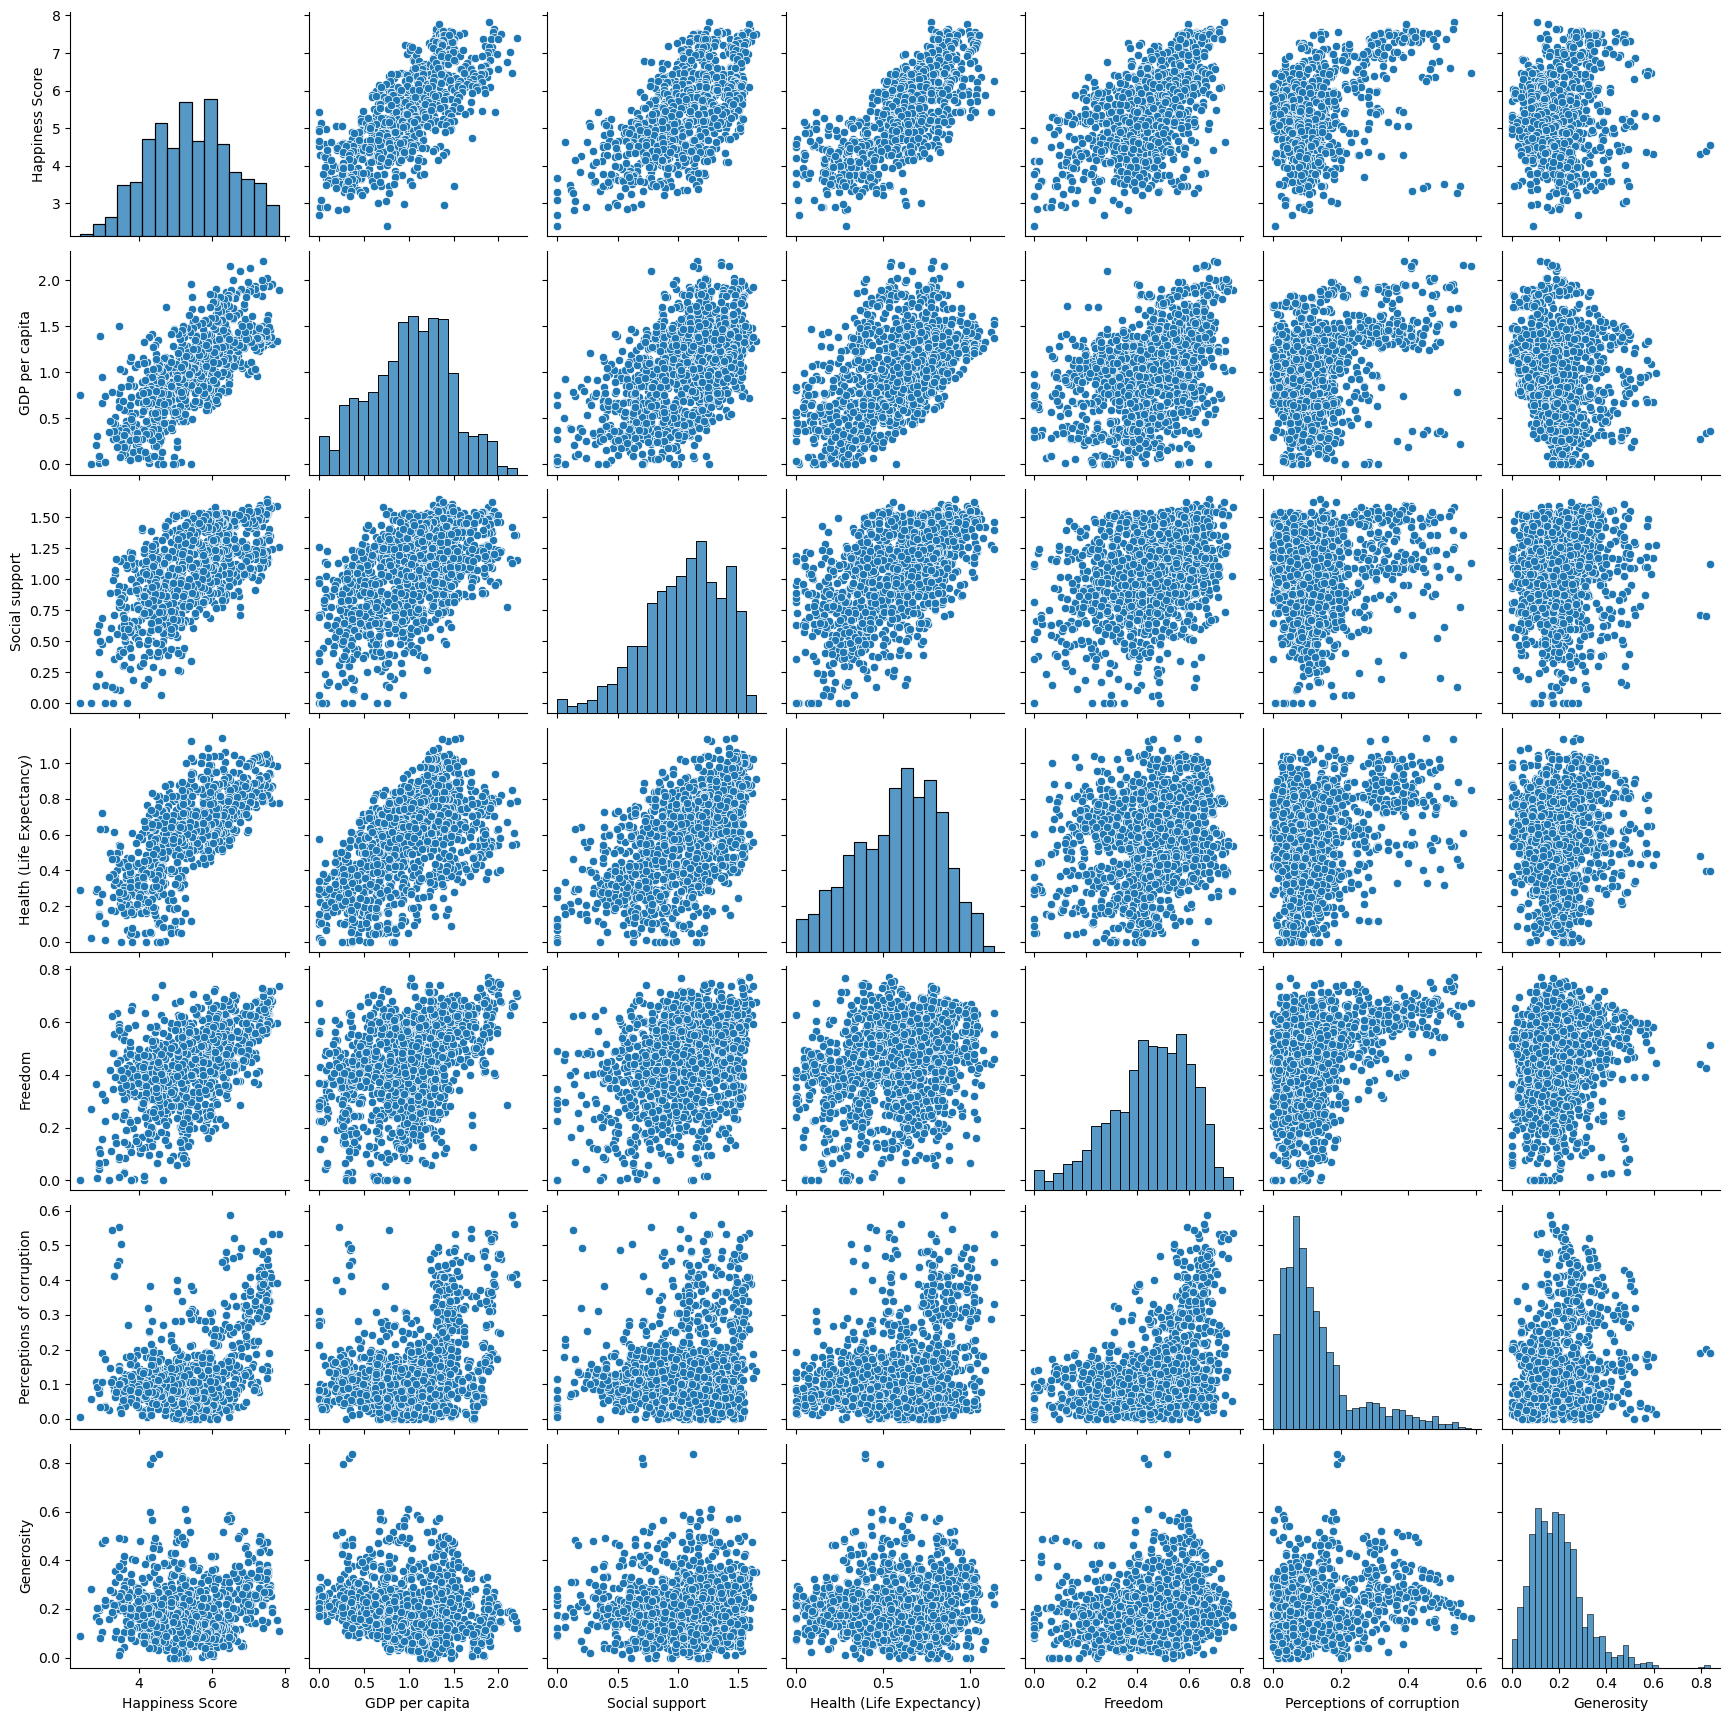

In [65]:
# Create a pair plot 

g = sns.pairplot(df_sub)

Again, another type of visualization could be more informative, but on the visualisations linked to the strongest correlations, the linear relationship is obvious (e.g. Happiness score - GDP per capita)

### Categorical plot

<Axes: xlabel='GDP per capita', ylabel='Count'>

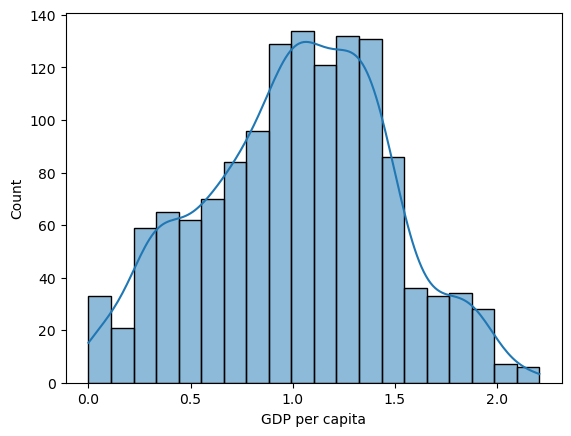

In [66]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['GDP per capita'], bins = 20, kde = True)

In [67]:
df.loc[df['GDP per capita'] < 0.7, 'Income category'] = 'Low income'

In [68]:
df.loc[(df['GDP per capita'] >= 0.7) & (df['GDP per capita'] < 1.5), 'Income category'] = 'Middle income'

In [69]:
df.loc[df['GDP per capita'] >= 1.5, 'Income category'] = 'High income'

In [70]:
df['Income category'].value_counts(dropna = False)

Income category
Middle income    853
Low income       343
High income      171
Name: count, dtype: int64

In [71]:
df.columns

Index(['Unnamed: 0', 'Country', 'Happiness Rank', 'Happiness Score',
       'GDP per capita', 'Social support', 'Health (Life Expectancy)',
       'Freedom', 'Perceptions of corruption', 'Generosity', 'Year',
       'Income category'],
      dtype='object')

C:\Users\Bori\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


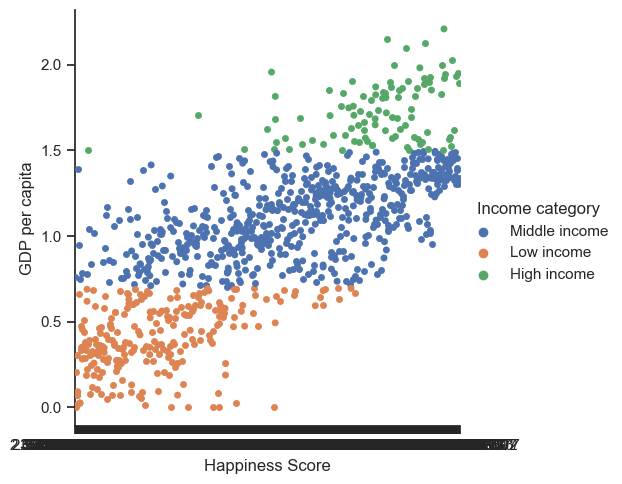

In [72]:
# Create a categorical plot in seaborn using the income categories created above

sns.set(style="ticks")
g = sns.catplot(x="Happiness Score", y="GDP per capita", hue="Income category", data=df)

In [73]:
g.savefig("out.png") 

From this figure, the correlation between happiness and income is even more obvious. It seems like No high income country has very low happiness score, and no low income country has very high happiness score.

In [76]:
#Exporting df with income category flags applied
df.to_csv(os.path.join(path, 'Prepared Data', 'happiness_income_flags.csv'))


### Question 7

In the previous task I determined other type of questions - rather linked to time and geographical variables, and their combinations. They will be addressed in another sub-task. Anyway, it was interesting to see correlations of the different variables, I was surprised on certain elements - e.g. corruption and generosity seem to not have so strong effect on happiness I would have expected. I was also surprised on the power of GDP per capita - happiness relationship, because it had the strongest correlation. This contradicts some of my recent readings. On the other hand, I was not surprised by the strengst og Health and GDP per capita relationship. It is totally undertandable a higher income contry can provide better healthcare, and people with higher income can afford better food, housing, etc. and tend to have lower stress level which variables are generraly mentioned as factors capable to directly impact health.

### Question 8 -  Hypothesis

Countries with higher per capita GDP tend to have higher happiness scores.

Countries with higher per capita GDP tend to have better health and higher life expectancy.

Countries with higher per capita GDP tend to have better social support.

Countries with more freedom are tend to be happier.

